<a href="https://colab.research.google.com/github/chimaCSC102/chimas-_python_projects/blob/main/consumer_complaint_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd

df = pd.read_csv("filename.csv")
print(df.info())
print(df.shape)
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10014 non-null  int64  
 1   conversation_id  10014 non-null  int64  
 2   created_at       10014 non-null  object 
 3   date             10014 non-null  object 
 4   time             10014 non-null  object 
 5   timezone         10014 non-null  int64  
 6   user_id          10014 non-null  int64  
 7   username         10014 non-null  object 
 8   name             10014 non-null  object 
 9   place            3 non-null      object 
 10  tweet            10014 non-null  object 
 11  language         10014 non-null  object 
 12  mentions         10014 non-null  object 
 13  urls             10014 non-null  object 
 14  photos           10014 non-null  object 
 15  replies_count    10014 non-null  int64  
 16  retweets_count   10014 non-null  int64  
 17  likes_count 

In [22]:
df = df[['language','tweet']]
print(df)

      language                                              tweet
0           en  @nazijaeger__ @derwener @Anonymous9775 Russia ...
1           en  The Russia HAARP which could destroy USA in on...
2           en  Putin gives Steven Seagal Russia&amp;#8217;s O...
3           en  @MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...
4           en  @Pottingpinks @mfa_russia @mod_russia @mil_his...
...        ...                                                ...
10009       en  @wallacemick Its not Ukraine which investere w...
10010       en  @tom_username_ There were very dark rumors tha...
10011       en  @elonmusk If Russia lose the Rothschild are co...
10012       en  @RonFilipkowski Look forward to Russia liberat...
10013       en  @Lyla_lilas I read it yes. It is heartbreaking...

[10014 rows x 2 columns]


In [23]:
df.isnull().sum()  #checking for null values

language    0
tweet       0
dtype: int64

In [24]:
df['language'].value_counts()

en     8858
pt      440
it      194
qme     105
und      60
in       47
ru       44
ja       42
es       36
ca       20
qht      20
th       19
fr       18
de       14
ko        9
vi        8
nl        8
ro        7
fi        7
ar        6
zxx       6
uk        6
cs        6
zh        5
pl        5
qam       4
tl        4
da        3
eu        2
no        2
hi        2
tr        2
hu        1
cy        1
lv        1
el        1
bn        1
Name: language, dtype: int64

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

#data cleaning
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["tweet"] = df["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
print(df)

      language                                              tweet
0           en      nazijaeg derwen  russia place satan rule well
1           en  russia haarp could destroy usa one fell swoop ...
2           en       putin give steven seagal  order friendship  
3           en       mainelif baddcompani it alway project russia
4           en  pottingpink mfarussia modrussia milhistrf muze...
...        ...                                                ...
10009       en  wallacemick ukrain invester war russia putin w...
10010       en  tomusernam dark rumor zelenski regim traffick ...
10011       en  elonmusk russia lose rothschild come u next ru...
10012       en      ronfilipkowski look forward russia liber kiev
10013       en  lylalila read yes heartbreak  russia terrorist...

[10014 rows x 2 columns]


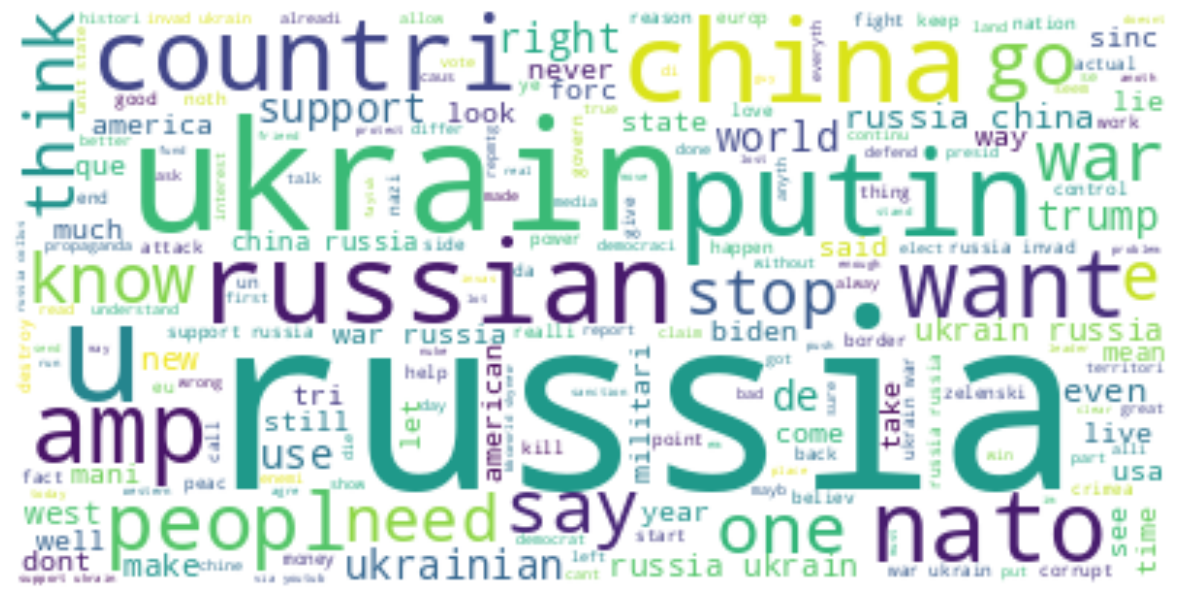

In [28]:
text = " ".join(i for i in df.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
#sentiment analysis part

nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive(%)"] = [(sentiments.polarity_scores(i)["pos"] * 100) for i in df["tweet"]]
df["Negative(%)"] = [(sentiments.polarity_scores(i)["neg"] * 100) for i in df["tweet"]]
df["Neutral(%)"] = [(sentiments.polarity_scores(i)["neu"] * 100) for i in df["tweet"]]
df = df[["tweet", "Positive(%)", "Negative(%)", "Neutral(%)"]]
print(df.head(20))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-32-418d5915f921>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Positive(%)"] = [(sentiments.polarity_scores(i)["pos"] * 100) for i in df["tweet"]]
<ipython-input-32-418d5915f921>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Negative(%)"] = [(sentiments.polarity_scores(i)["neg"] * 100) for i in df["tweet"]]


                                                tweet  Positive(%)  \
0       nazijaeg derwen  russia place satan rule well         25.9   
1   russia haarp could destroy usa one fell swoop ...          0.0   
2        putin give steven seagal  order friendship           36.7   
3        mainelif baddcompani it alway project russia          0.0   
4   pottingpink mfarussia modrussia milhistrf muze...          6.8   
5    genflynn know governor would investig fbi rig...          0.0   
6   riyadh🇸🇦  im  yarmuk  malaz exit   al mughriza...         13.2   
7   kathykrobot ronfilipkowski hmm zelenski coward...          0.0   
8    sentdefend russia took bakhmut fortifi ever s...          0.0   
9   sudan eritrea host russian militari base russi...          0.0   
10  taviduprix  dcdraino nato russia protect sover...         30.0   
11  elonmusk ceo tesla warn prolong russian war uk...          9.0   
12  unit state impos tariff steel aluminum import ...         17.2   
13  sincerament que 

<ipython-input-32-418d5915f921>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Neutral(%)"] = [(sentiments.polarity_scores(i)["neu"] * 100) for i in df["tweet"]]
